## Prelude

In [1]:
import matplotlib.pyplot as plt
import scienceplots

plt.style.use(["science", "no-latex", "cjk-sc-font"])

## 使用随机森林算法对样本数据进行分类

### 导入乳腺癌数据集

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

X_breast_cancer, y_breast_cancer = load_breast_cancer(return_X_y=True)

### 利用交叉验证对比决策树与随机森林的分类效果

In [3]:
dt_pipe = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=42))

rf_pipe = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=42))


dt_cross_score = cross_val_score(dt_pipe, X_breast_cancer, y_breast_cancer, cv=5).mean()
rf_cross_score = cross_val_score(rf_pipe, X_breast_cancer, y_breast_cancer, cv=5).mean()

print(f"Decision Tree Cross Validation Score: {dt_cross_score}")
print(f"Random Forest Cross Validation Score: {rf_cross_score}")

Decision Tree Cross Validation Score: 0.9173420276354604
Random Forest Cross Validation Score: 0.9560937742586555


### 测试弱分类器个数对分类精度的影响

In [4]:
import numpy as np

def rf_score_for_n(n):
    rf_pipe = make_pipeline(
        StandardScaler(), RandomForestClassifier(n_estimators=n, random_state=42)
    )
    return cross_val_score(rf_pipe, X_breast_cancer, y_breast_cancer, cv=5).mean()


ns_estimators = np.arange(1, 202, 10)
rf_cross_scores = [rf_score_for_n(n) for n in ns_estimators]

plt.plot(ns_estimators, rf_cross_scores)
plt.xlabel("n_estimators")
plt.ylabel("Cross Validation Score")
plt.title("弱分类器数量对随机森林性能的影响")
plt.savefig("figures/RandomForest_n_estimators.png", dpi=300)
plt.show()

KeyboardInterrupt: 

## 使用AdaBoost对样本数据进行分类

### 利用交叉验证对比决策树与AdaBoost的分类效果

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_pipe = make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=42))

ada_cross_score = cross_val_score(
    ada_pipe, X_breast_cancer, y_breast_cancer, cv=5
).mean()

print(f"Decision Tree Cross Validation Score: {dt_cross_score}")
print(f"AdaBoost Cross Validation Score: {ada_cross_score}")


Decision Tree Cross Validation Score: 0.9173420276354604
AdaBoost Cross Validation Score: 0.9701133364384411


### 测试 n_estimators 参数对分类精度的影响

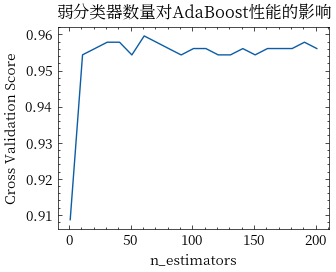

In [ ]:
def ada_score_for_n(n):
    ada_pipe = make_pipeline(
        StandardScaler(), AdaBoostClassifier(n_estimators=n, random_state=42)
    )
    return cross_val_score(ada_pipe, X_breast_cancer, y_breast_cancer, cv=5).mean()


ns_estimators = np.arange(1, 202, 10)
ada_cross_scores = [ada_score_for_n(n) for n in ns_estimators]

plt.plot(ns_estimators, rf_cross_scores)
plt.xlabel("n_estimators")
plt.ylabel("Cross Validation Score")
plt.title("弱分类器数量对AdaBoost性能的影响")
plt.savefig("figures/AdaBoost_n_estimators.png", dpi=300)
plt.show()


## 使用GradientBoost对样本数据进行分类

### 利用交叉验证对比决策树与GradientBoost的分类效果

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

grad_pipe = make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=42))

grad_cross_score = cross_val_score(
    grad_pipe, X_breast_cancer, y_breast_cancer, cv=5
).mean()

print(f"Decision Tree Cross Validation Score: {dt_cross_score}")
print(f"Gradient Boost Cross Validation Score: {grad_cross_score}")


Decision Tree Cross Validation Score: 0.9173420276354604
Gradient Boost Cross Validation Score: 0.9613724576929048


### 测试learning_rate参数对分类精度的影响

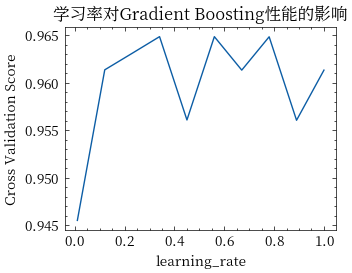

In [ ]:
def grad_score_for(**kwargs):
    grad_pipe = make_pipeline(
        StandardScaler(), GradientBoostingClassifier(**kwargs, random_state=42)
    )
    return cross_val_score(grad_pipe, X_breast_cancer, y_breast_cancer, cv=5).mean()


learning_rates = np.linspace(0.01, 1, 10)
grad_cross_scores_lr = [grad_score_for(learning_rate=lr) for lr in learning_rates]

plt.plot(learning_rates, grad_cross_scores_lr)
plt.xlabel("learning_rate")
plt.ylabel("Cross Validation Score")
plt.title("学习率对Gradient Boosting性能的影响")
plt.savefig("figures/GradientBoosting_learning_rate.png", dpi=300)
plt.show()

### 测试 n_estimators 参数对分类精度的影响

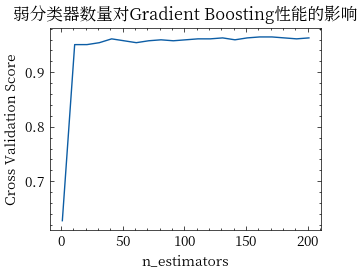

In [ ]:
ns_estimators = np.arange(1, 202, 10)
grad_cross_scores_ns = [grad_score_for(n_estimators=n) for n in ns_estimators]

plt.plot(ns_estimators, grad_cross_scores_ns)
plt.xlabel("n_estimators")
plt.ylabel("Cross Validation Score")
plt.title("弱分类器数量对Gradient Boosting性能的影响")
plt.savefig("figures/GradientBoosting_n_estimators.png", dpi=300)
plt.show()


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)
model = GradientBoostingRegressor(n_estimators=50, random_state=42)
model.fit(X_train, y_train)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print(f"Train score: {train_score}")
print(f"Test score: {test_score}")

Train score: 0.9616269080603728
Test score: 0.8602426816568048
